In [5]:
!pip install kagglehub


First few rows of the dataset:
   PatientID  Age Gender  BMI     SurgeryType SurgeryDuration AnesthesiaType  \
0          1   33      M   32    Neurological         217 min          Local   
1          2   33      M   23  Cardiovascular         181 min          Local   
2          3   58      F   24      Orthopedic          79 min        General   
3          4   65      F   26      Orthopedic         210 min          Local   
4          5   65      M   28    Neurological         221 min        General   

        PreoperativeNotes              PostoperativeNotes  PainLevel  \
0  Hypertension, diabetes  Minimal pain, no complications          7   
1    Stable, no allergies  Minimal pain, no complications          7   
2    Stable, no allergies  Minimal pain, no complications          3   
3    Stable, no allergies             Pain, slow recovery          7   
4    Stable, no allergies             Pain, slow recovery          5   

           Complications  Outcome  
0                 

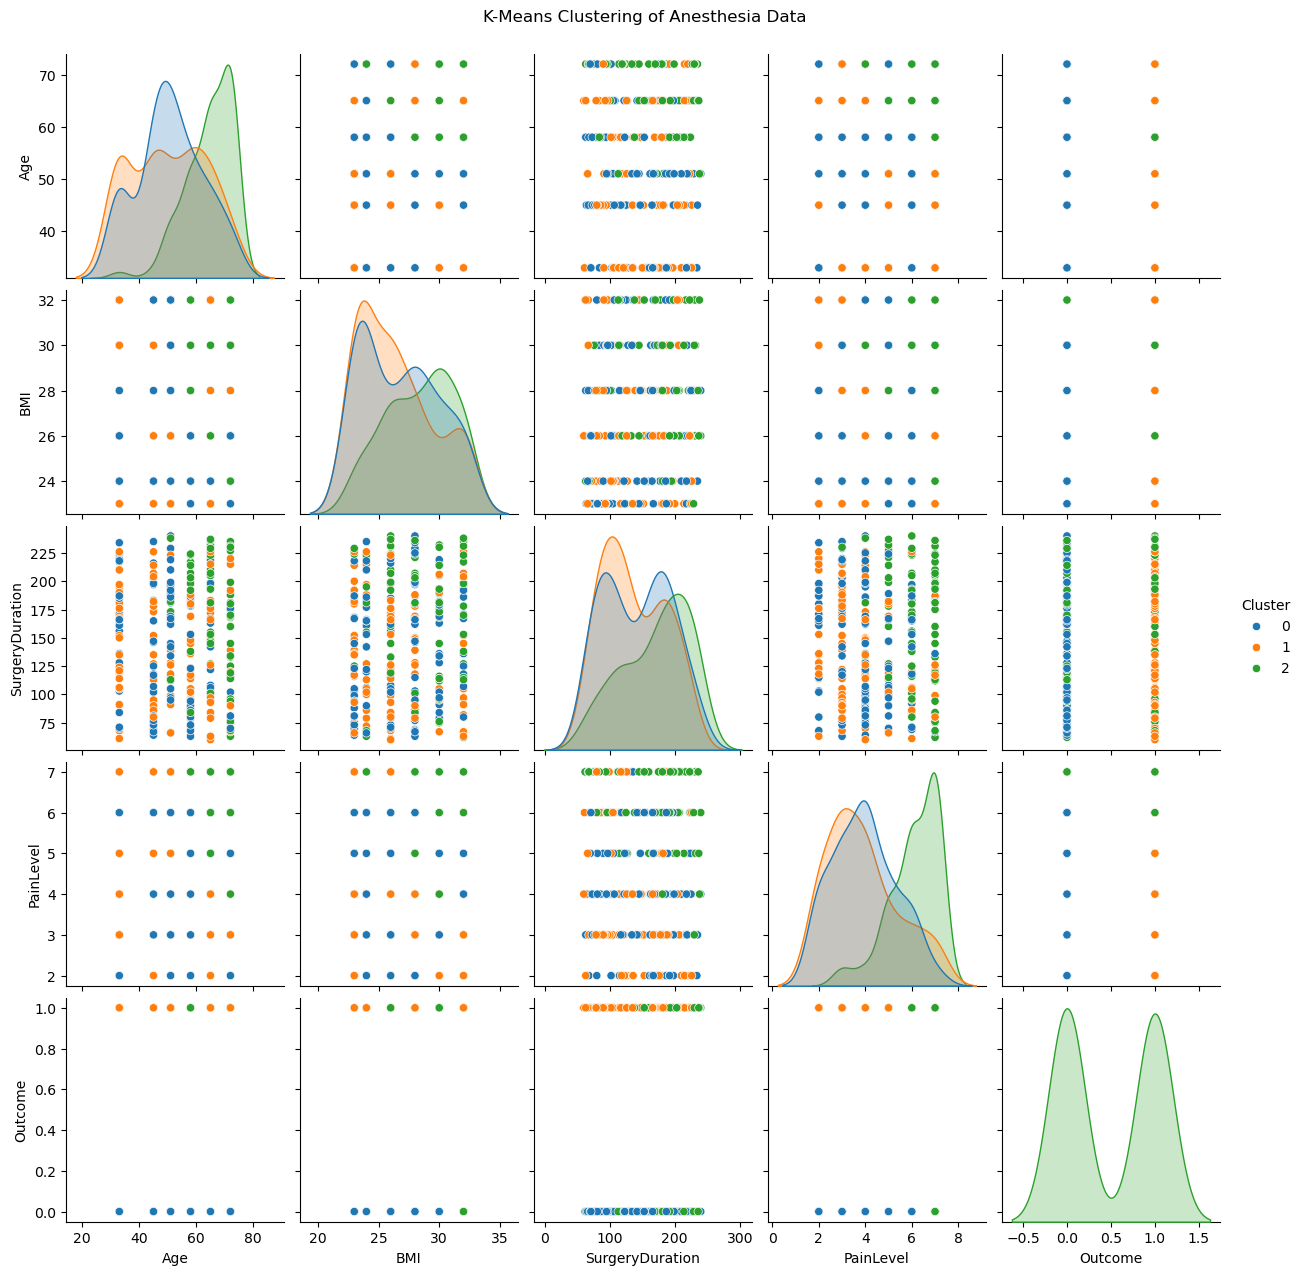


Cluster centers (standardized):
[[-0.2697149  -0.09266803 -0.10307484 -0.33555518 -1.        ]
 [-0.31849548 -0.20980571 -0.21812238 -0.37948403  1.        ]
 [ 0.7954744   0.40962276  0.43492123  0.96689824 -0.01234568]]

Cluster sizes:
Cluster
1    110
0    109
2     81
Name: count, dtype: int64

Feature averages per cluster:
               Age        BMI  SurgeryDuration  PainLevel   Outcome
Cluster                                                            
0        50.788991  26.770642       142.394495   3.944954  0.000000
1        50.163636  26.409091       136.472727   3.872727  1.000000
2        64.444444  28.320988       170.086420   6.086420  0.493827


In [15]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Download dataset to a specific directory
# target_directory = "./my_target_dir"
# path = kagglehub.dataset_download(
#     "s3programmerlead/personalized-anesthesia-management-dataset",
#     download_dir=target_directory
# )
# print("Path to dataset files:", path)

# # 2. List the files to find the dataset CSV
# print("\nFiles in the dataset directory:")
# for f in os.listdir(path):
#     print(f)

# # 3. Load the data (update filename if necessary)
# csv_file = os.path.join(path, 'Personalized_Anesthesia_Management.csv')
df = pd.read_csv("Anesthesia_Dataset.csv")
print("\nFirst few rows of the dataset:")
print(df.head())

# Convert 'SurgeryDuration' from '217 min' to integer (minutes)
df['SurgeryDuration'] = df['SurgeryDuration'].str.replace(' min', '').astype(int)

# Select only numerical features for clustering
features = ['Age', 'BMI', 'SurgeryDuration', 'PainLevel', 'Outcome']
df_selected = df[features].dropna()

# Preprocess (scale) the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# KMeans clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_selected['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
sns.pairplot(df_selected, hue='Cluster', diag_kind='kde', palette='tab10')
plt.suptitle('K-Means Clustering of Anesthesia Data', y=1.02)
plt.show()

# Analyze clusters
print("\nCluster centers (standardized):")
print(kmeans.cluster_centers_)

print("\nCluster sizes:")
print(df_selected['Cluster'].value_counts())

print("\nFeature averages per cluster:")
print(df_selected.groupby('Cluster').mean())